# Ngbanja-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale](#Technologische-Merkmale)
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
        * [G7a](#G7a)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)
* [Appendix](#Appendix)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'NGB'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [3]:
sql = """SELECT
           t_Ort.ort_kurz,
           [t_Ort].[ort_name] || ' (Fpl. ' || [Kat-Nr] || ')' AS name,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE ((t_Obj.Typ) Like '%"""+style+"""%')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
BatMLB / NGB (?)     1
NGB                 20
NGB (?)             34
NGB/BatMLB (?)       2
NGB/KON (?)          1
OUE/NGB (?)          2
All                NaN
Name: Anzahl, dtype: float64

In [4]:
df.loc[df['Anzahl'] != 1]

,ort_kurz,name,bef_art,objID,Typ,Form_Gef,Anzahl,Fabric
18,PIK,Pikunda (Fpl. 255),Grube,2715,NGB (?),,NaN,None
19,PIK,Pikunda (Fpl. 255),Grube,2717,NGB (?),,NaN,None


> hierbei handelt es sich um das Material, das 1987 'verlocht' wurde

Von wie vielen Fundstellen stammen die sicheren Stücke?

In [5]:
# nur sichere Stücke herausfiltern - keine () im Typ-Ausdruck
a = df.loc[~df['Typ'].str.contains(' ()')]
a['name'].value_counts()

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from IPython.kernel.zmq import kernelapp as app


Ngbanja (Fpl. 199)    8
Nzambi (Fpl. 205)     8
Ouesso (Fpl. 265)     2
Pandama (Fpl. 276)    1
Matoto (Fpl. 264)     1
Name: name, dtype: int64

In [6]:
df.pivot_table(values = 'Anzahl', index = ['bef_art', 'ort_kurz'], aggfunc = sum, margins = True)

bef_art  ort_kurz
Grube    MLB          2
         PIK          4
Oberfl   EBE          1
         IKM          9
         LKA          1
         MAO          1
         MAT          2
         MOS          1
         MTB          1
         NGB         11
         NZA         12
         OUE         11
         PDM          2
         PIK          2
All                 NaN
Name: Anzahl, dtype: float64

In [6]:
a = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
a = pd.DataFrame(a)
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
bef_art,,
Grube,6,10
Oberfl,54,90


## Technologische Merkmale

In [9]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%NGB%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [10]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


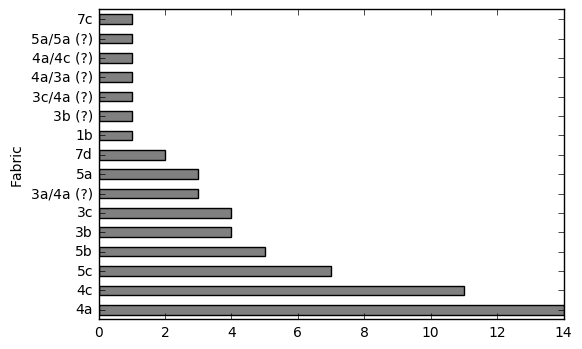

In [11]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [12]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
4a,14,23.333333
4c,11,18.333333
5c,7,11.666667
5b,5,8.333333
3b,4,6.666667


In [15]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
MagerungDichte,,
,2,3.333333
<1,1,1.666667
mittel,5,8.333333
sehr viel,20,33.333333
viel,28,46.666667
wenig,4,6.666667


In [16]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
MagerungArt,,
,2,3.333333
Laterit,1,1.666667
Org/Gl/Laterit,1,1.666667
Org/Laterit (?),1,1.666667
S,49,81.666667
S/Gl/Laterit,1,1.666667
S/Laterit,2,3.333333
S/Laterit (?),1,1.666667
S/Latertit,1,1.666667


### Brennfarbe

In [62]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe,
           t_Ort.ort_fluss
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%NGB%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,24,37.5000
Sonstig,25,39.0625
Weiß,15,23.4375


In [58]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [59]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

s        32
g        32
bg       29
          8
bg bg     6
g bg      5
br s      2
bg g      2
g g       2
bg s      2
dtype: int64

In [60]:
a.head()

,objID,Farbe,ort_fluss
3,5168,S/S/S/Br/Br,Ngoko
4,4703,////,Sangha
5,4712,////,Sangha
7,4695,S/G/Bg/G/G/G/Bg,Sangha
13,4612,Bg/Bg/G/G/G/Bg,Sangha


In [66]:
a = df[df['Farbe'].str.contains("W|R")]
s = a['Farbe'].str.split('/').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'col'
a_pivot = a.join(s).pivot_table(values = 'objID', columns = 'ort_fluss', index = 'col', aggfunc = len)
a_pivot

ort_fluss,Lua,Ngoko,Sangha,Ubangi
col,,,,
BR,NaN,NaN,1.0,NaN
Bg,2.0,NaN,2.0,18.0
Br,2.0,3.0,4.0,13.0
G,5.0,1.0,20.0,20.0
R,1.0,2.0,34.0,38.0
S,2.0,NaN,6.0,7.0
W,2.0,NaN,26.0,16.0
br,NaN,1.0,NaN,NaN


### Oberfläche der Scherben

in dieser Betrachtung keine fraglischen Stücke, sondern nur sicher NGB-Gruppe:

In [69]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_name,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) = 'NGB'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [70]:
df_pivot = df.pivot_table(values = 'Anzahl', columns = 'ort_name', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

ort_name,Matoto,Ngbanja,Nzambi,Ouesso,Pandama
Obfl,,,,,
glatt,1.0,3.0,NaN,NaN,NaN
leicht rau,NaN,4.0,2.0,NaN,1.0
rau,NaN,1.0,6.0,2.0,NaN


### Wandung

In [71]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%NGB%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


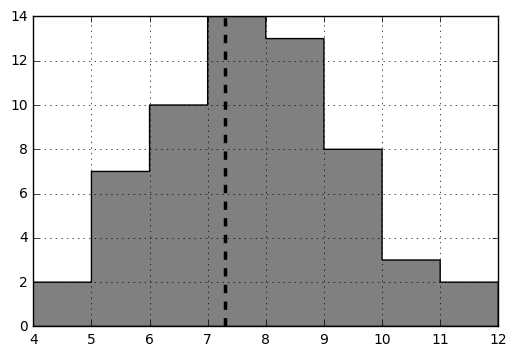

In [72]:
bins = df['Wandung'].max() - df['Wandung'].min()
mean = df['Wandung'].mean()
df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)

In [73]:
df['Wandung'].describe()

/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    59.000000
mean      7.305085
std       1.724611
min       4.000000
25%            NaN
50%            NaN
75%            NaN
max      12.000000
Name: Wandung, dtype: float64

In [74]:
df['Wandung'].var()

2.9742840444184706

## Gefäßformen

In [75]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%NGB%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [76]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=[False])
display(df_pivot.head())

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,objID
Form_Gef,
C1 (?),11
C1,4
G3/G7 (?),4
C2 (?),1
D1,1


In [77]:
df_pivot['objID'].sum()

25

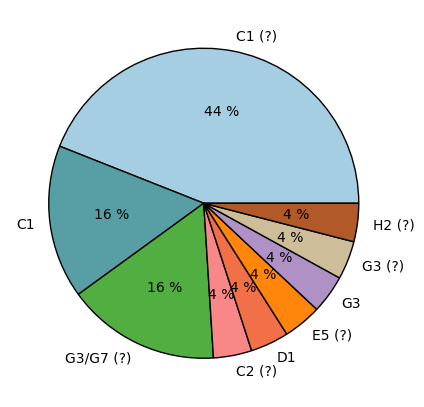

In [78]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [79]:
a = pd.Series({'sichere Bestimmung':len(df.loc[~df['Form_Gef'].str.contains("\?")].index),
               'fragliche Bestimmung':len(df.loc[df['Form_Gef'].str.contains("\?")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fragliche Bestimmung,19,76.0
sichere Bestimmung,6,24.0


ohne die (?):

In [80]:
# löschen der (?)
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=[False])

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [81]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

### G7a

In [28]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Bauch,
           t_Obj.Form_Boden,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%NGB%')
           AND ((t_Obj.Form_Gef) Like '%G7a%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [29]:
df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len, margins = True)

Form_Gef
G7a         4
G7a (?)    10
All        14
Name: objID, dtype: float64

In [30]:
df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)

Form_Mdg
      12
M2     2
Name: objID, dtype: int64

In [31]:
df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)

Form_Rand
         11
B1        1
B1/B2     1
M2        1
Name: objID, dtype: int64

In [32]:
df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)

Form_Hals
          8
A3        2
B2/B1     1
B3        2
B3 (?)    1
Name: objID, dtype: int64

In [33]:
df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)

Form_Schulter
              1
A1 (?)        2
A1/A2         4
A1/A2/lang    1
A1/A3         1
A2            4
B1/B3         1
Name: objID, dtype: int64

In [34]:
df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)

Form_Bauch
          5
A1        6
A1 (?)    1
A1/A3     1
A1/D2     1
Name: objID, dtype: int64

In [35]:
df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)

Form_Boden
      13
B4     1
Name: objID, dtype: int64

In [36]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           t_Komplex.bef_nr,
           t_Obj.Individuum,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%NGB%')
           AND ((t_Obj.Form_Gef) Like '%G7a%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)
df.describe()

,objID,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD
count,14.000000,3.0,2.00000,10.000000,2.000000,8.000000,3.000000,2.000000
mean,3467.357143,14.0,12.25000,13.850000,55.500000,17.812500,7.166667,3.250000
std,2165.924092,3.0,1.06066,2.483837,62.932504,4.382901,1.607275,4.596194
min,322.000000,11.0,11.50000,9.500000,11.000000,11.500000,6.000000,0.000000
25%,2050.250000,12.5,11.87500,13.000000,33.250000,15.625000,6.250000,1.625000
50%,3885.000000,14.0,12.25000,14.000000,55.500000,17.000000,6.500000,3.250000
75%,5264.000000,15.5,12.62500,15.125000,77.750000,19.875000,7.750000,4.875000
max,6010.000000,17.0,13.00000,18.000000,100.000000,24.000000,9.000000,6.500000


In [37]:
x = df['maxD']
y = df['muendungsH']

plt.plot(x, y, 'o', color = 'grey')
plt.xlabel("maximaler Durchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")
plt.axis('equal')

(11.0, 19.0, 11.4, 13.0)

In [38]:
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

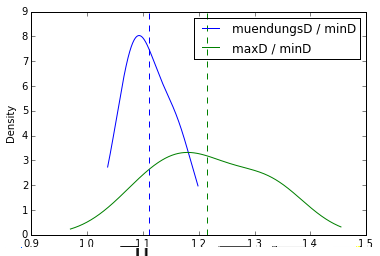

In [39]:
df2 = df['muend-min'].dropna()
df3 = df['max-min'].dropna()
mean2 = df2.mean()
mean3 = df3.mean()

df2.plot(kind = 'kde', label="muendungsD / minD")
df3.plot(kind = 'kde', label="maxD / minD")
plt.axvline(mean2, color = 'blue', ls = 'dashed')
plt.axvline(mean3, color = 'green', ls = 'dashed')
plt.legend()

In [40]:
mean2

1.1105306691045229

In [41]:
mean3

1.2148926813612722

## Mündungs- und Randformen

In [82]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%NGB%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)

In [83]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,7,26.923077
M4,5,19.230769
M5,4,15.384615
M1,3,11.538462
M1/M2,2,7.692308
M3,2,7.692308
M3/M5 (?),1,3.846154
M4/M5,1,3.846154
M5/M3,1,3.846154


> **Tab. #** Ngbanja-Gruppe: Mündungsformen

In [84]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1/B2,6,22.222222
B2,6,22.222222
B1,4,14.814815
B1.1,2,7.407407
A1,1,3.703704
A1/B1,1,3.703704
A1/B1 (?),1,3.703704
B1.4,1,3.703704
B2.2,1,3.703704


> **Tab. #** Ngbanja-Gruppe: Randformen

In [85]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [46]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

27

In [47]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

16

In [48]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Bodenformen

In [5]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Boden
0,MTB,Motenge-Boma,322,BTM / NGB (?),B4
1,PIK,Pikunda,698,NGB (?),B4 (?)
2,NGB,Ngbanja,5291,NGB,B1


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


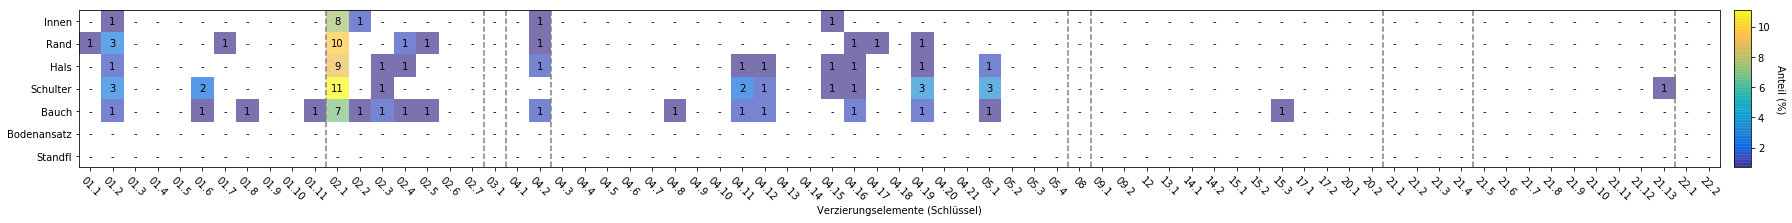

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-2_Ngbanja_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [146]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%NGB%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [147]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

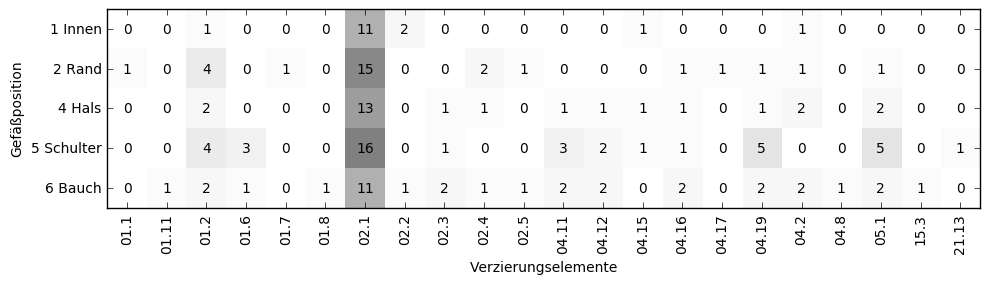

In [148]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-1-2_Ngbanja_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [149]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot_a = df_pivot.fillna('-')
#df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

In [151]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Spectral_r')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')

for (i, j), z in np.ndenumerate(df_pivot_a):
    plt.text(j, i, z, ha='center', va='center')

# for (i, j), z in np.ndenumerate(df_pivot_a):
#     plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

plt.tight_layout()
plt.show()

In [92]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [93]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

## Verbreitung

In [6]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
2,Loka (Fpl. 193),193,17.945614,0.320338,NGB (?)
0,Ebeka (Fpl. 197),197,18.031148,1.429335,NGB (?)
1,Ngbanja (Fpl. 199),199,18.092242,1.665022,NGB
2,Nzambi (Fpl. 205),205,18.637255,3.161920,NGB
7,Motenge-Boma (Fpl. 206),206,18.648645,3.244495,NGB (?)
4,Maoko (Fpl. 207),207,18.642191,3.407332,NGB (?)
3,Maluba (Fpl. 230),230,18.523706,2.806193,NGB (?)
5,Pikunda (Fpl. 255),255,16.635736,0.549344,NGB
1,Ikelemba (Fpl. 260),260,16.504824,1.227166,NGB (?)
6,Mosanya (Fpl. 262),262,16.447391,1.213000,NGB (?)


In [7]:
df.to_csv("../data/processed/3-1-1-2_NGB_Verbreitung.csv", index = False)

## Appendix

gehören NGB 85/101:142 & PIK 87/1-1:1 wirklich zur Ngbanja-Gruppe

Viel viele Stilgruppen kommen in Ngbanaja (Fpl. 199) vor?

In [57]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) == 'NGB')
           AND ((t_Obj.Art) == 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [58]:
df_pivot = df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

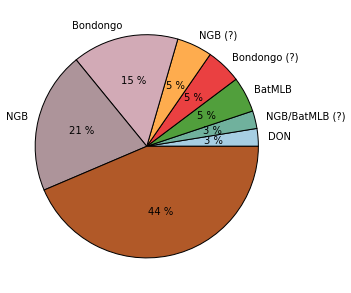

In [59]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

nur solche Stücke, die einer Stilgruppe zugewiesen wurden:

In [60]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) == 'NGB')
           AND ((t_Obj.Typ) != '')
           AND ((t_Obj.Typ) Not Like '(?)'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

In [61]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

wenn die fraglichen Stücke einfach mit einbezogen werden:

In [62]:
df['Typ'] = df['Typ'].map(lambda x: x.rstrip(' (?)'))

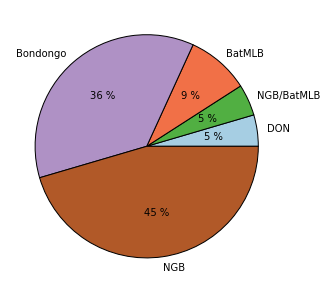

In [63]:
df_pivot = df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

## Vergesellschaftung von NGB mit BTM

In [19]:
sql = """SELECT
           t_Ort.ort_kurz,
           [t_Ort].[ort_name] || ' (Fpl. ' || [Kat-Nr] || ')' AS name,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE ((t_Obj.Typ) Like '%"""+style+"""%')
           OR ((t_Obj.Typ) Like '%BTM%')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df.head()

,ort_kurz,name,bef_art,objID,Typ,Form_Gef,Anzahl,Fabric
0,DON,Dongo (Fpl. 202),Oberfl,94,BTM,C2,1.0,3a
1,DON,Dongo (Fpl. 202),Oberfl,96,BTM,D1,1.0,4c
2,DON,Dongo (Fpl. 202),Oberfl,97,BTM,I2,1.0,6a
3,DON,Dongo (Fpl. 202),Oberfl,98,BTM,C2,1.0,4a
4,DON,Dongo (Fpl. 202),Oberfl,99,BTM,C2,1.0,5b


In [20]:
df.pivot_table(values = 'Anzahl', index = 'name', columns = 'Typ', aggfunc = sum)

Typ,BTM,BTM (?),BTM / MDB (?),BTM / NGB (?),NGB,NGB (?),NGB/BTM (?),NGB/KON (?),OUE/NGB (?)
name,,,,,,,,,
Bomboko (Fpl. 210),2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dongo (Fpl. 202),24.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ebeka (Fpl. 197),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Ikelemba (Fpl. 260),NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
Libenge (Fpl. 208),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loka (Fpl. 193),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Maluba (Fpl. 230),127.0,18.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
Maoko (Fpl. 207),2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Matoto (Fpl. 264),NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [21]:
sql = """SELECT
           t_Ort.ort_kurz,
           [t_Ort].[ort_name] || ' (Fpl. ' || [Kat-Nr] || ')' AS name,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE ((t_Obj.Typ) = '"""+style+"""')
           OR ((t_Obj.Typ) = 'BTM')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df.head()

,ort_kurz,name,bef_art,objID,Typ,Form_Gef,Anzahl,Fabric
0,DON,Dongo (Fpl. 202),Oberfl,94,BTM,C2,1,3a
1,DON,Dongo (Fpl. 202),Oberfl,96,BTM,D1,1,4c
2,DON,Dongo (Fpl. 202),Oberfl,97,BTM,I2,1,6a
3,DON,Dongo (Fpl. 202),Oberfl,98,BTM,C2,1,4a
4,DON,Dongo (Fpl. 202),Oberfl,99,BTM,C2,1,5b


In [22]:
df.pivot_table(values = 'Anzahl', index = 'name', columns = 'Typ', aggfunc = sum)

Typ,BTM,NGB
name,,
Bomboko (Fpl. 210),2.0,NaN
Dongo (Fpl. 202),24.0,NaN
Libenge (Fpl. 208),1.0,NaN
Maluba (Fpl. 230),127.0,NaN
Maoko (Fpl. 207),2.0,NaN
Matoto (Fpl. 264),NaN,1.0
Mbati-Ngombe (Fpl. 204),1.0,NaN
Mokelo (Fpl. 213),5.0,NaN
Ngbanja (Fpl. 199),2.0,8.0


## Tafeln

In [4]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,5,7,EBE,85/101,NaN,1,NGB/BTM (?),D1,B2,None
1,6,6,NGB,85/101,NaN,133,NGB,G3,B3.1 (?),None
2,6,7,NGB,85/101,NaN,130,NGB,C1,B1/B2,None
3,6,8,NGB,85/101,NaN,131,NGB,C1,B1,B1
4,6,9,NGB,85/101,NaN,142,NGB,None,None,None
5,6,10,NGB,85/101,NaN,132,NGB,C1 (?),None,None
6,7,1,NGB,85/101,NaN,62,NGB,G3/G7 (?),None,None
7,15,2,MAO,85/101,NaN,47,NGB (?),None,B1.1,None
8,27,6,MLB,85/1-3-2,NaN,-5:35,NGB (?),H2 (?),C1/C3,None
9,47,19,PIK,87/1,NaN,-9:7,NGB (?),None,None,None
